# ASSIGNMENT 1

Nama : Rachma Lingga Maulidya (PYTN-KS13-024)

INSTALL LIBRARY:
pip install numpy
pip install geopy
pip install geopandas
pip install pandas
pip install matplotlib
pip install folium
pip install wordcloud

In [1]:
#IMPORT LIBRARIES
#untuk pemrosesan data
import numpy as np
import pandas as pd
import requests

#untuk mencari lattitude dan longitude setiap wilayah
import geopandas as gpd
from geopy.geocoders import Nominatim

#membuat peta
import folium
from folium import plugins

#untuk keperluan plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

#analisis statistik
from scipy import stats
import scipy.stats as stats

# untuk membuat wordcloud
from wordcloud import WordCloud

PERSIAPAN DATA

In [2]:
#Memanggil data yang akan digunakan dengan pandas
data = pd.read_csv("G:\HACKTIV8\london_crime_by_lsoa.csv", dtype={'year':str, 'month':str})
data.sample(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
12070018,E01002463,Hillingdon,Burglary,Burglary in Other Buildings,0,2009,2
1586958,E01004202,Tower Hamlets,Theft and Handling,Theft From Shops,0,2010,9
12335297,E01004023,Southwark,Drugs,Other Drugs,0,2012,9
5328475,E01001334,Ealing,Drugs,Possession Of Drugs,4,2014,3
89007,E01003455,Merton,Robbery,Personal Property,0,2010,11
9182778,E01001127,Croydon,Violence Against the Person,Assault with Injury,0,2011,2
12107226,E01003209,Lewisham,Criminal Damage,Criminal Damage To Motor Vehicle,0,2010,5
12306776,E01000195,Barnet,Other Notifiable Offences,Other Notifiable,0,2010,1
4976176,E01002326,Havering,Violence Against the Person,Harassment,1,2011,10
253266,E01001272,Ealing,Criminal Damage,Criminal Damage To Dwelling,0,2010,12


Keterangan :
years            = menampung List of years (2008 - 2016)
boroughs         = menampung List of borough atau wilayah
major_categories = menampung List of major_categories (Kejahatan Mayor)
minor_categories = menampung List of minor_categories (Kejahatan Minor)
colors_list      = menampung List of matplotlib colors untuk keperluan plotting
months           = menampung List of range months from 1 to 12

In [3]:
print("Total keseluruhan missing values = ",
      data.isnull().sum().sum())

Total keseluruhan missing values =  0


In [4]:
#Menghitung dan menampilkan deskripsi statistik dan transpose
data.describe(include = 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
year,13490604,9,2016,1498956
month,13490604,12,11,1124217


In [5]:
#mengecek data tahun
data['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

In [6]:
# Menghitung dan menampilkan deskripsi statistik
summary_num = data.describe(include = np.number)
summary_num

,value
count,1.349060e+07
mean,4.779444e-01
std,1.771513e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,3.090000e+02


In [7]:
summary_num = data.describe(include = np.number)
print('min: {}, max: {}, uni values: {}, mode: {}'.
      format(int(summary_num['value']['min']),
             int(summary_num['value']['max']),
             data['value'].unique().shape[0],
             stats.mode(data['value'], keepdims = True)[0][0]))

min: 0, max: 309, uni values: 247, mode: 0


Dataset london crime memiliki 7 kolom (lsoa_code, borough, major_category, minor_category, value, year, dan month). Borough berjumlah 33, kategori kejahatan major memilik 9 jenis dan kejahatan kategori minor sebanyak 32 jenis dari periode tahun 2008 sampai 2016. Variable value merupakan satu satunya variabel numeric pada dataset. Var value mewakili jumlah laporan bulanan kategori kejahatan pada setiap wilayah dengan unique valuenya 247, maximal value 309 dan minimal value adalah 0.

# Questions

1. Apa kategori kejahatan utama (Major Category) yang paling banyak di London dari tahun 2008 sampai 2016 dan berapa jumlahnya?
2. Apakah jenis kasus Minor Category yang paling banyak di London dari tahun 2008 sampai 2016?
3. Pada tahun 2012, kejahatan kategori major apa yang terjadi?
4. Pada tahun berapa kejahatan di London banyak terjadi?
5. Bagimana tren total kasus kejahatan major di London dari 2008 sampai 2016?
6. Wilayah mana yang memiliki jumlah kasus kejahatan paling banyak?

# Pie Chart

In [8]:
#Mengelompokkan data kategori 'major_category', menghitung jumlah total nilai serta mengurutkan dari terdikit hingga terbanyak
datakasus = data.groupby('major_category', axis = 0).sum(numeric_only = True)
datakasus.sort_values(by = 'value', ascending = False)

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


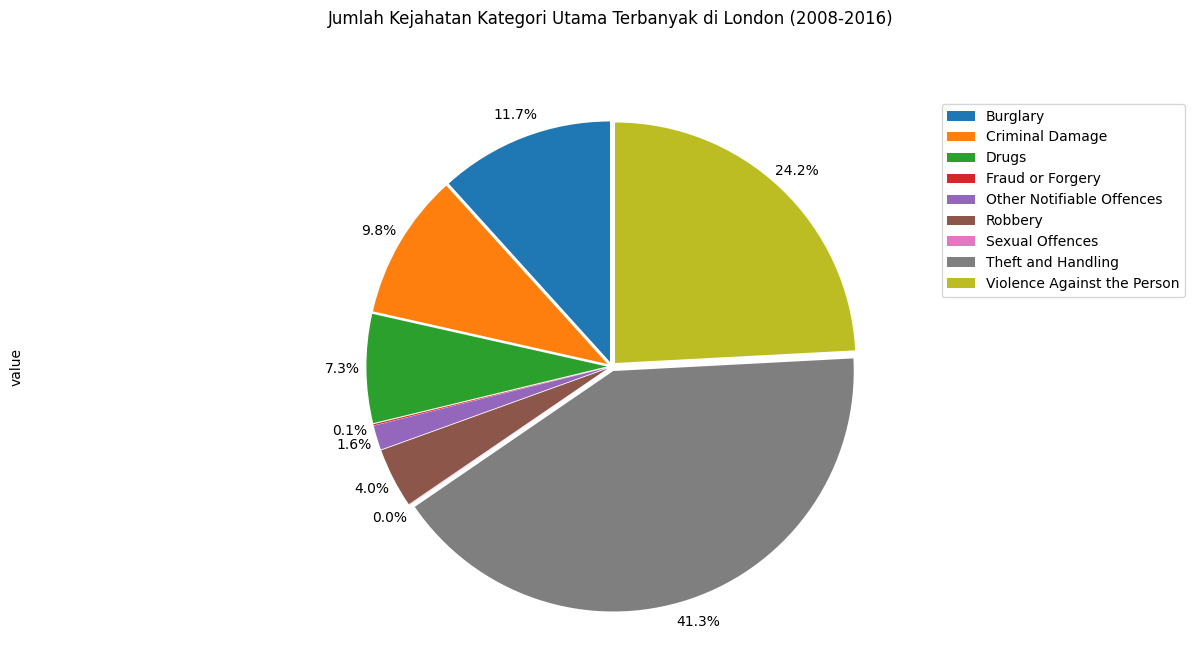

In [9]:
#membuat pie chart
datakasus['value'].plot(kind ='pie',
                        figsize = (15,7),
                        autopct = '%1.1f%%',
                        startangle = 90, #menentukan posisi sektor-sektor lingkaran pie chart
                        labels = None,
                        pctdistance = 1.1, #jarak persentase data dari tengah lingkaran
                        explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
                       )
plt.title("Jumlah Kejahatan Kategori Utama Terbanyak di London (2008-2016)", y = 1.12)
plt.axis('equal')
plt.legend(labels = datakasus.index, loc = 'best')
plt.show()

Berdasarkan Pie chart diatas dapat dilihat bahwa kejahatan dengan jumlah paling banyak pada kasus major category menurut data london crime pada tahun 2008-2016 adalah Theft and Handling dengan persentase 41.3% (atau sejumlah 2.661.861 kasus), dan diikuti Violence Against the Person yang mengambil tempat kedua dengan persentase 24.2% (atau sejumlah 1.558.081 kasus). Sedangkan untuk yang paling sedikit adalah Sexual Offences dengan presentase 0.0% (atau sejumlah 1.273 kasus).

# Area Plot

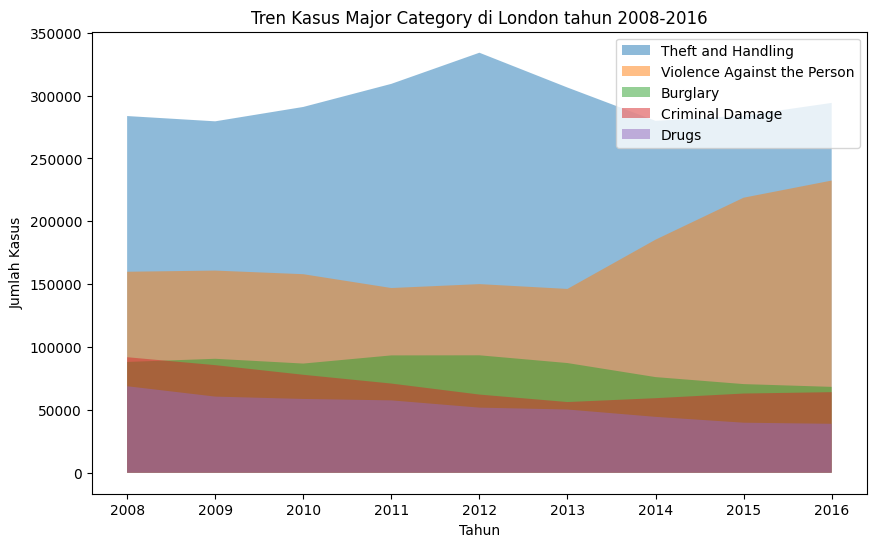

In [31]:
#mengubah kolom 'year' menjadi tipe data datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

#membuat grup data berdasarkan 'major_category' dan 'year'
data_by_category_year = data.groupby(['major_category', pd.Grouper(key='year', freq='1Y')]).sum(numeric_only = True)

#mengambil 5 kategori utama dengan jumlah kasus terbanyak
top_categories = data.groupby('major_category').sum(numeric_only = True).sort_values(by='value', ascending=False).head()['value'].index

#membuat area plot untuk tiap kategori utama
plt.figure(figsize=(10, 6))
for category in top_categories:
    plt.fill_between(data_by_category_year.loc[category].index.year, data_by_category_year.loc[category]['value'], alpha=0.5)

#menambahkan label pada sumbu x dan y, dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.title('Tren Kasus Major Category di London tahun 2008-2016')

#menampilkan plot
plt.legend(top_categories)
plt.show()


1. Berdasarkan area plot diatas dapat kita lihat bahwa akumulasi kelima kategori kejahatan mayor ini cenderung meningkat dan cenderung menurun dari tahun 2008 sampai 2012.
2. Pada kasus Theft and Handling memiliki kenaikan ditahun 2012 dan hampir mencapai titik 350.000, namun mengalami penurunan di tahun 2014 dan kembali meningkat di tahun 2016.
3. Pada kasus Violence Against the Person yang mengalami kenaikan drastis di tahun 2013 ke tahun 2016 mencapai nilai 240.000an.
4. Pada kasus Burglary cenderung stabil diawal, lalu sedikit meningkat, dan mengalami sedikit penurunan.
5. Pada kasus Criminal Damage mengalami penurunan diawal hampir mencapai titik 50.000 lalu kembali mengalami penaikan walau sedikit.
6. Pada kasus Drugs dari tahun 2008 sampai dengan 2016 cenderung mengalami penurunan.

# Histogram

<Figure size 1000x800 with 0 Axes>

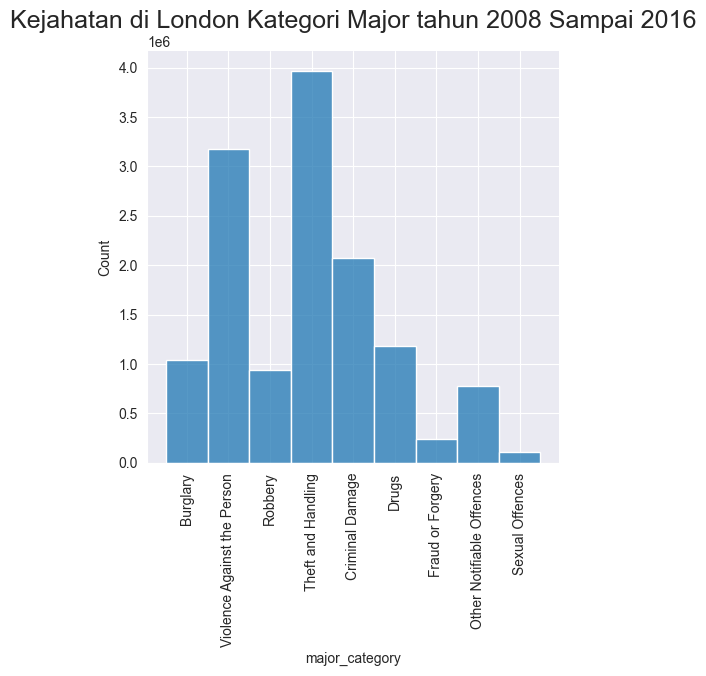

In [12]:
sns.set_style('darkgrid')
# membuat displot
plt.figure(figsize = (10, 8)) # set ukuran grafik
sns.displot(data = data, x = 'major_category', kde = False)
plt.title('Kejahatan di London Kategori Major tahun 2008 Sampai 2016', size=18)
plt.xticks(rotation = 90) #rotasi keterangan sumbu x
plt.show()

Berdasarkan histogram diatas mengenai banyaknya kejahatan kategori major dari tahun 2008 sampai 2016, dapat dilihat bahwa Theft and Handling memiliki kasus paling banyak dibandingkan 8 kasus lainnya disusul dengan Violence Against the Person. Sedangkan untuk jumlah paling sedikit adalag Sexual Offences.

# Bar Chart

In [13]:
dataminor = data.groupby('minor_category', axis = 0).sum(numeric_only = True)
#mengurutkan data berdasarkan nilai pada kolom 'value' secara menaik (ascending)
dataminor.sort_values(by = 'value', ascending = False)

,value
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001
Possession Of Drugs,431948
Common Assault,413690
Theft From Shops,345142
Other Theft Person,308842


<Axes: title={'center': 'Jumlah Kejahatan Minor Category Terbanyak di London (2008-2016)'}, ylabel='minor_category'>

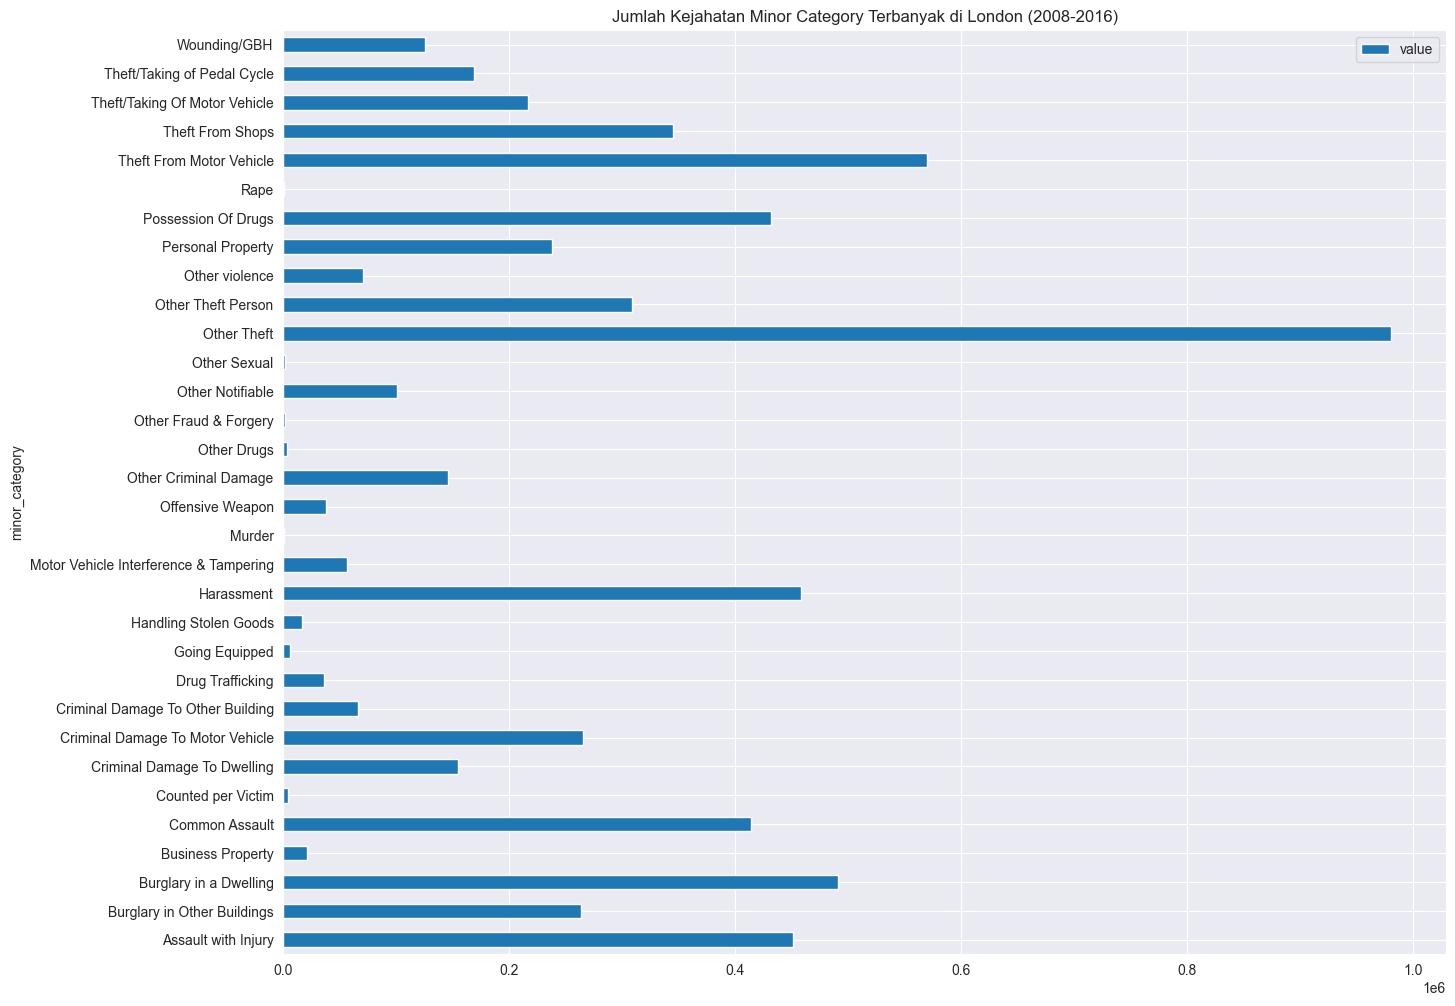

In [14]:
dataminor.plot.barh(figsize = (15, 12),
                         title = "Jumlah Kejahatan Minor Category Terbanyak di London (2008-2016)")

Sesuai tabel dan bar chart diatas, dapat dilihat bahwa dari 32 kasus yang ada pada kategori minor menurut data London crime by LSOA, Other Theft memiliki jumlah laporan bulanan yang paling banyak selama tahun 2008 sampai 2016 yaitu sebesar 980.085, disusul oleh kasus Theft From Motor Vehicle dengan jumlah 569.956. Sedangkan yang paling sedikit terjadi adalah Rape yaitu sebanyak 268.

# Scatter Plot

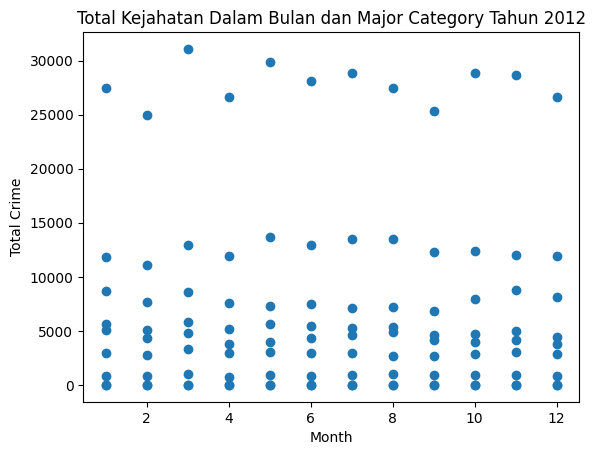

In [116]:
data = pd.read_csv("G:\HACKTIV8\london_crime_by_lsoa.csv")

# filter data untuk tahun 2012
datascatter = data[data['year'] == 2012]

# groupby major_category dan Month dan melakukan sum
datascatternew = datascatter.groupby(['major_category', 'month'])['value'].sum().reset_index()

# plot scatter chart
plt.scatter(datascatternew['month'], datascatternew['value'])
plt.xlabel('Month')
plt.ylabel('Total Crime')
plt.title('Total Kejahatan Dalam Bulan dan Major Category Tahun 2012')
plt.show()

Berdasarkan scatter plot diatas terdapat jumlah kasus major ditahun 2012 dari bulan pertama (Januari) sampai bulan ke-12 (Desember). Dapat dilihat bahwasannya bulan ketiga (Maret) tahun 2012 memiliki jumlah kasus yang cenderung lebih banyak dalam berbagai jenis kasus kategori major daripada bulan lainnya.

# Boxplot 

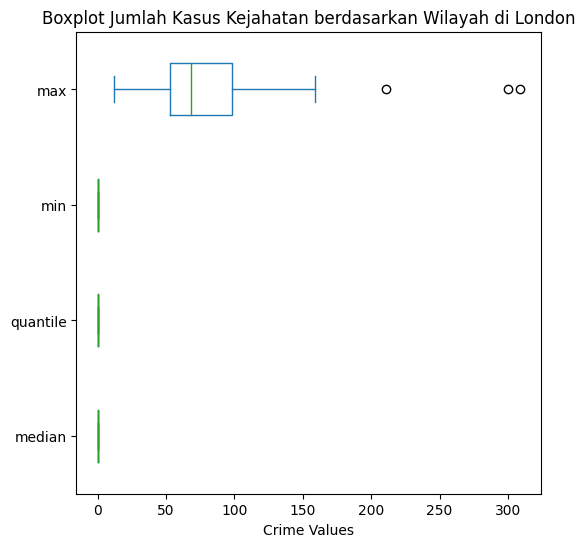

In [38]:
data_boxplot = data[['borough', 'value']]
grouped = data_boxplot.groupby('borough')['value'].agg(['median', 'quantile', 'min', 'max'])
grouped.plot(kind='box', vert=False, figsize=(6,6))
plt.title('Boxplot Jumlah Kasus Kejahatan berdasarkan Wilayah di London')
plt.xlabel('Crime Values')
plt.show()

Bedasarkan boxplot diatas, dapat dilihat bahwa nilai maximal kasus kejahatan pada tahun 2008-2016 ditiap wilayah yang ada di London mencapai lebih dari 300.

# Folium Maps

In [10]:
# Mengelompokkan data berdasarkan kategori 'borough' dan menjumlahkan nilai pada kolom 'value'
total_crimes_by_borough = data.groupby('borough')['value'].sum().reset_index()
total_crimes_by_borough.sort_values(by = 'value', ascending = False)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


In [8]:
# setting latitude and longitude for London Maps
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(location = [london_lattitude, london_longitude],
                        zoom_start = 10
                       )

In [11]:
#data london_boroughs berikut link nya: https://drive.google.com/file/d/13Q2tX2nmMoO6h1M2F_taSTdhLSv3EZVt/view?usp=sharing
london = r'G:\HACKTIV8\london_boroughs.json' 

folium.Choropleth(geo_data=london, data=total_crimes_by_borough, columns=['borough', 'value'], key_on='feature.properties.name',
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, legend_name='Kasus Kejahatan di London'
                 ).add_to(london_map)
london_map

Berdasarkan folium maps diatas, dapat dilihat bahwa terdapat gambar wilayah london yang berwarna dari range kuning sampai merah. Dari warna tersebut diartikan bahwa untuk wilayah dengan range kuning memiliki tingkat kejahatan yang terbilang sedikit, contohnya yaitu city of london sebanyak 780 dan Kota Kingston upon Thames	sebanyak 89306. Lalu, salah satu wilayah yang menempati range orange adalah Lambeth dengan total kasus sebanyak 292178. Sedangkan untuk wilayah dengan range merah ditempati oleh Kota Westminster dengan jumlah kasus sebanyak 455028.

# Word Clouds

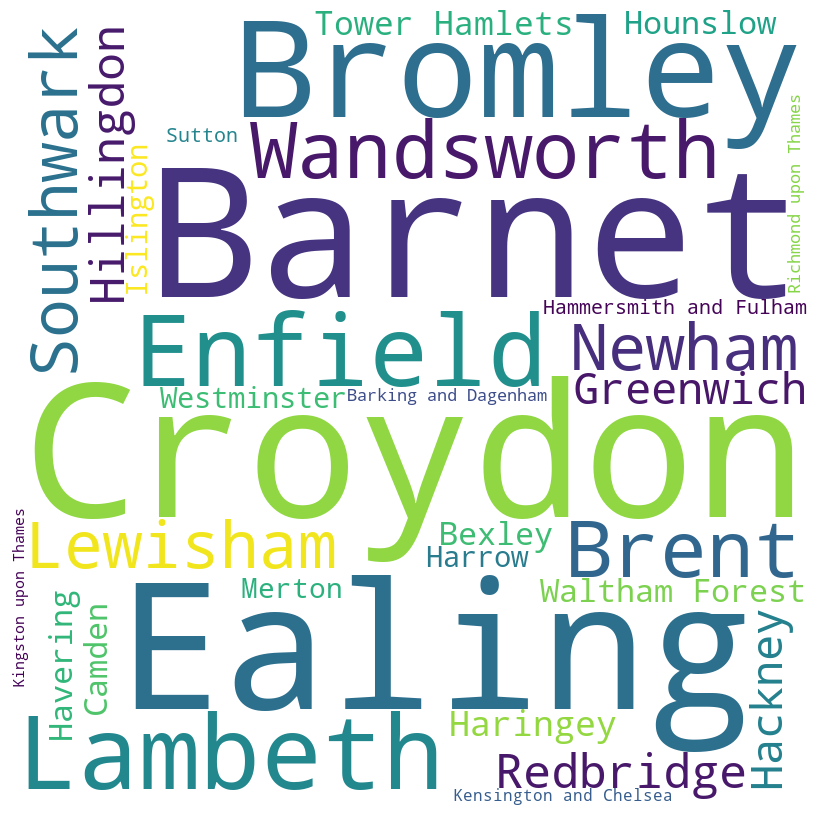

In [41]:
#berdasarkan borough
crime_count = data.groupby(['borough']).size().reset_index(name='counts')

#wordcloud berdasarkan borough
text = dict(zip(crime_count['borough'], crime_count['counts']))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate_from_frequencies(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Overall Analisis

Adapun kesimpulan dari data visualisasi diatas adalah:
1. Berdasarkan data visualisasi (Pie Chart dan Histogram) dapat disimpulkan bahwa kejahatan dengan jumlah paling banyak menurut data london crime pada tahun 2008-2016 pada kasus major category adalah Theft and Handling dengan persentase 41.3% yang diikuti Violence Against the Person dengan persentase 24.2% Sedangkan untuk yang paling sedikit adalah Sexual Offences dengan presentase 0.0% (atau sejumlah 1.273 kasus).
2. Berdasarkan data visualisasi (Area Plot) dapat disimpulkan bahwa kasus kejahatan selalu terjadi setiap tahunnya (dari 2008-2016). Akumulasi 5 kategori kejahatan mayor tertinggi cenderung meningkat dan cenderung menurun dari tahun 2008 sampai 2012. Namun untuk tingkat terjadinya berbeda di tiap kasus.
3. Berdasarkan data visualisasi (Bar Chart) dapat disimpulkan bahwa dari 32 kasus yang ada pada kategori minor menurut data London crime by LSOA, Other Theft memiliki jumlah laporan bulanan yang paling banyak selama tahun 2008 sampai 2016 yaitu sebesar 980.085, disusul oleh kasus Theft From Motor Vehicle dengan jumlah 569.956. Sedangkan yang paling sedikit terjadi adalah Rape yaitu sebanyak 268.
4. Berdasarkan data visualisasi (Scatter Plot) dapat disimpulkan bahwa jumlah kasus major ditahun 2012 dari bulan pertama (Januari) sampai bulan ke-12 (Desember), pada bulan ketiga (Maret) tahun 2012 memiliki jumlah kasus yang cenderung lebih banyak dalam berbagai jenis kasus kategori major daripada bulan lainnya.
5. Bedasarkan data visualisasi (Boxplot) dapat disimpulkan bahwa nilai maximal kasus kejahatan pada tahun 2008-2016 ditiap wilayah yang ada di London mencapai lebih dari 300 kasus.
6. Berdasarkan folium maps, tingkat kejahatan yang paling rendah terjadi di city of london yaitu sebanyak 780 dan disusul oleh Kota Kingston upon Thames yaitu sebanyak 89306, dimana wilayah tersebut menempati wilayah berwarna kuning. Lalu, salah satu wilayah yang menempati range orange adalah Lambeth dengan total kasus sebanyak 292178. Sedangkan untuk wilayah dengan range merah merupakan wilayah dengan kasus terbanyak yaitu ditempati oleh Kota Westminster dengan jumlah kasus sebanyak 455028.